<h2 style="color: gold;">Showing First Five Rows</h2>


In [1]:
import pandas as pd
flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df.head()

,Date,Flight Name,Type,Operator,Occupants,Survivors,Fatalities,Weather,Travel Route,Cause
0,10-01-00,Crossair Flight 498,Saab 340,Crossair,10,0,10,Unknown,Basel to Dresden,Pilot Error
1,13-01-00,Avisto Short 360,Short 360,Avisto,41,19,22,Cold and icy,Tripoli to Benghazi,Weather
2,30-01-00,Kenya Airways Flight 431,Boeing 737-200,Kenya Airways,179,10,169,Unknown,Abidjan to Lagos,Collision
3,31-01-00,Alaska Airlines Flight 261,McDonnell Douglas MD-83,Alaska Airlines,88,0,88,Clear,Puerto Vallarta to Seattle,Horizontal stabilizer Failure
4,16-02-00,Emery Worldwide Flight 17,McDonnell Douglas DC-8,Emery Worldwide,3,0,3,Clear,Sacramento to Dayton,Mechanical Failure


<h2 style="color: gold;">Summary Of Dataframe</h2>

In [2]:
flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          496 non-null    object
 1   Flight Name   496 non-null    object
 2   Type          496 non-null    object
 3   Operator      496 non-null    object
 4   Occupants     496 non-null    object
 5   Survivors     496 non-null    object
 6   Fatalities    496 non-null    object
 7   Weather       496 non-null    object
 8   Travel Route  496 non-null    object
 9   Cause         496 non-null    object
dtypes: object(10)
memory usage: 38.9+ KB


<h2 style="color: gold;">Summarize Statistics In Terms Of Categorical Values</h2>


In [3]:
flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')
flight_df.describe()

,Date,Flight Name,Type,Operator,Occupants,Survivors,Fatalities,Weather,Travel Route,Cause
count,496,496,496,496,496,496,496,496,496,496
unique,474,496,230,376,187,146,115,34,484,60
top,11-09-01,Air India Flight 171,Boeing 737-800,Southwest Airlines,2,0,0,Clear,Pokhara to Jomsom,CFIT
freq,6,1,26,8,25,195,134,208,4,124


<h2 style="color: gold;"> Summarize Statistics In Terms Of Numerical Values</h2>

In [4]:
flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

cols_to_convert = ['Occupants', 'Survivors', 'Fatalities']
flight_df[cols_to_convert] = flight_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

flight_df.describe()


,Occupants,Survivors,Fatalities
count,493.000000,493.000000,493.000000
mean,80.920892,52.405680,28.515213
std,89.026007,90.459901,48.415905
min,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000
50%,46.000000,3.000000,8.000000
75%,131.000000,83.000000,28.000000
max,520.000000,520.000000,298.000000


<h2 style="color: gold;"> Summing Null Values</h2>

In [5]:
flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df.isnull().sum()

Date            0
Flight Name     0
Type            0
Operator        0
Occupants       0
Survivors       0
Fatalities      0
Weather         0
Travel Route    0
Cause           0
dtype: int64

<h2 style="color: gold;"> OBJECTIVE NO.1 : Calculate survivor & fatality rate (percentage) per year</h2>

In [6]:
import pandas as pd

# Convert the 'Date' column to actual datetime format so we can work with years properly
flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')

# Extract just the year from each date and save it in a new column called 'Year'
flight_df['Year'] = flight_df['Date'].dt.year

# Make sure that 'Survivors' and 'Fatalities' columns contain numeric values
flight_df['Survivors'] = pd.to_numeric(flight_df['Survivors'], errors='coerce')
flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')

# Group the data by each year and calculate the total number of survivors and fatalities per year
yearly_data = flight_df.groupby('Year')[['Survivors', 'Fatalities']].sum().dropna()

# Add a new column to store the total number of people involved in crashes each year
yearly_data['Total'] = yearly_data['Survivors'] + yearly_data['Fatalities']

# Calculate what percentage of people died in crashes each year
yearly_data['Fatality Rate (%)'] = (yearly_data['Fatalities'] / yearly_data['Total']) * 100

# Calculate what percentage of people survived each year
yearly_data['Survivor Rate (%)'] = (yearly_data['Survivors'] / yearly_data['Total']) * 100

# Display the key stats for each year
yearly_data[['Survivors', 'Fatalities', 'Fatality Rate (%)', 'Survivor Rate (%)']]



C:\Users\kk\AppData\Local\Temp\ipykernel_8312\2843136228.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')


,Survivors,Fatalities,Fatality Rate (%),Survivor Rate (%)
Year,,,,
2000,1766.0,915.0,34.129056,65.870944
2001,1885.0,1056.0,35.906154,64.093846
2002,1014.0,1021.0,50.171990,49.828010
2003,230.0,600.0,72.289157,27.710843
2004,155.0,482.0,75.667190,24.332810
2005,1405.0,897.0,38.966116,61.033884
2006,762.0,842.0,52.493766,47.506234
2007,1126.0,749.0,39.946667,60.053333
2008,1889.0,502.0,20.995399,79.004601


<h2 style="color: gold;">OBJECTIVE NO.2 : Survivors and fatalities per year (with visualizations) </h2>

C:\Users\kk\AppData\Local\Temp\ipykernel_8312\155443609.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')


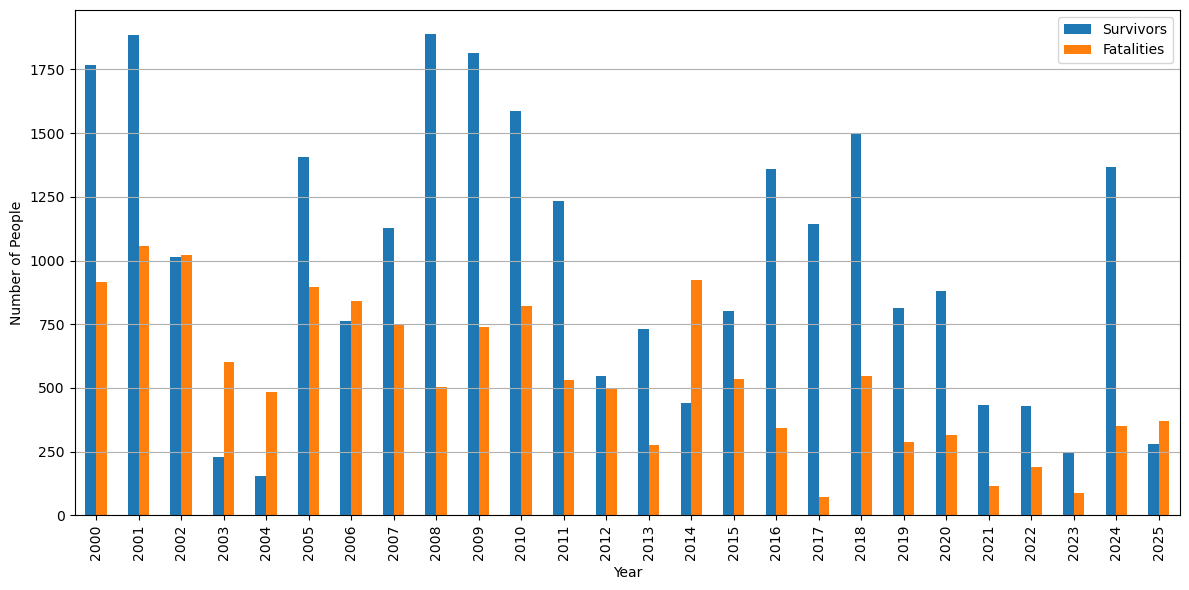

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')


flight_df['Survivors'] = pd.to_numeric(flight_df['Survivors'], errors='coerce')
flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')

flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')
flight_df['Year'] = flight_df['Date'].dt.year

# Group the data by year and calculate the total number of survivors and fatalities each year
yearly = flight_df.groupby('Year')[['Survivors', 'Fatalities']].sum().dropna()

# Plot a bar graph to compare survivors and fatalities per year
yearly.plot(kind='bar', figsize=(12, 6))
title = ('Survivors vs Fatalities Per Year')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



<h2 style="color: gold;"> ADDITIONAL : Calculate survivor and fatality rates for the years 2000 to 2025</h2>

In [8]:
import pandas as pd

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')
flight_df['Year'] = flight_df['Date'].dt.year

# Keep only the data between the years 2000 and 2025
filtered_df = flight_df[(flight_df['Year'] >= 2000) & (flight_df['Year'] <= 2025)]

filtered_df['Survivors'] = pd.to_numeric(filtered_df['Survivors'], errors='coerce')
filtered_df['Fatalities'] = pd.to_numeric(filtered_df['Fatalities'], errors='coerce')

# Adding up all the survivors and fatalities in the selected time range
total_survivors = filtered_df['Survivors'].sum()
total_fatalities = filtered_df['Fatalities'].sum()

# Calculating the total number of people involved in crashes
total_people = total_survivors + total_fatalities

# Calculating the percentage of people who died in crashes
fatality_rate = (total_fatalities / total_people) * 100

# Calculating the percentage of people who survived
survivor_rate = (total_survivors / total_people) * 100

print(f"Total number of Survivors (2000–2025): {total_survivors}")
print(f"Total number of Fatalities (2000–2025): {total_fatalities}")
print(f"Fatality Rate (2000–2025): {fatality_rate:.2f}%")
print(f"Survivor Rate (2000–2025): {survivor_rate:.2f}%")



Total number of Survivors (2000–2025): 25836.0
Total number of Fatalities (2000–2025): 14058.0
Fatality Rate (2000–2025): 35.24%
Survivor Rate (2000–2025): 64.76%


C:\Users\kk\AppData\Local\Temp\ipykernel_8312\835544080.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')


<h2 style="color: gold;">OBJECTIVE NO.3 : Count how many times each cause of incident occurred?</h2>

In [9]:
flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

# Clean up the 'Cause' column by removing any extra spaces from the beginning and end of each entry
flight_df['Cause'] = flight_df['Cause'].astype(str).str.strip()

# Count the number of times each unique cause appears in the data
cause_counts = flight_df['Cause'].value_counts()

# Display each cause along with how many times it occurred
for cause, count in cause_counts.items():
    print(f"{cause}: {count}")


CFIT: 125
Engine Failure: 63
Pilot Error: 54
Runway Overrun: 46
Hijack: 28
Weather: 17
Mechanical Failure: 16
Unknown: 16
Fire: 15
Collision: 15
Stall: 12
Icing: 7
Missile: 6
Overloading: 5
Birdstrike: 5
Gear Failure: 4
Structural Failure: 4
Fuel Exhaustion: 4
System Failure: 3
Spatial Disorientation: 3
Thrust Insufficient: 2
Hydraulic Failure: 2
Windshear: 2
Lightning: 2
Electrical Failure: 2
Explosion: 2
Terrorism: 2
Fuel: 2
Runway Excursion: 2
Landing Gear Failure: 2
Fuel exhaustion: 1
Gunfire: 1
Horizontal stabilizer Failure: 1
Landing gear Failure: 1
Explosive Decompression: 1
Disease Transmission: 1
Structural error: 1
Rudder Failure: 1
Fatigue: 1
Instrument Failure: 1
Servo Failure: 1
Trim Failure: 1
Engine Fire: 1
Go-around loss: 1
Approach: 1
Hard landing: 1
Tire Failure: 1
Taxiway Landing: 1
Hypoxia: 1
Ditching: 1
Navigation Error: 1
Overload: 1
Altimeter: 1
Sucide: 1
Sabotage: 1
Bombing: 1
Software Failure: 1
Turbulence: 1


<h2 style="color: gold;"> ADDITIONAL : Count how many times each incident occurs by visualization?</h2>

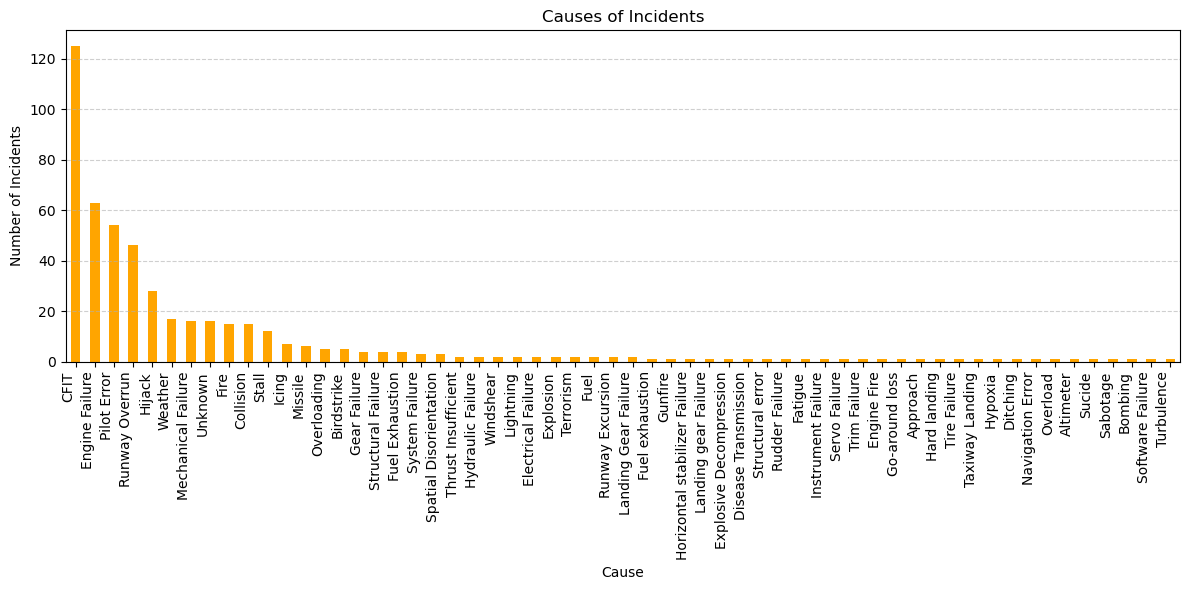

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Cause'] = flight_df['Cause'].astype(str).str.strip()

cause_counts = flight_df['Cause'].value_counts()

# Creating a bar chart to visualize the causes
plt.figure(figsize=(12, 6))
cause_counts.plot(kind='bar', color='orange')
plt.title('Causes of Incidents')
plt.xlabel('Cause')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



<h2 style="color: gold;">OBJECTIVE NO.4 : Identify years with the highest number of incidents</h2>

In [11]:
import pandas as pd

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')
flight_df['Year'] = flight_df['Date'].dt.year

incidents_per_year = flight_df['Year'].value_counts().sort_values(ascending=False)

# Showing full list of years with the highest number of incidents
pd.set_option('display.max_rows', None)
print(incidents_per_year)



Year
2011    31
2001    30
2009    30
2010    29
2008    28
2000    26
2016    25
2013    25
2002    24
2007    23
2005    22
2018    21
2024    19
2012    19
2006    18
2003    16
2019    16
2015    15
2004    14
2017    12
2021    12
2014    10
2020     9
2022     9
2025     9
2023     4
Name: count, dtype: int64


C:\Users\kk\AppData\Local\Temp\ipykernel_8312\4176296425.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')


<h2 style="color: gold;">ADDITIONAL : Calculate annual incident rate (percentage)</h2>

In [12]:
import pandas as pd

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')
flight_df['Year'] = flight_df['Date'].dt.year

# Counting how many incidents occurred each year
incidents_per_year = flight_df['Year'].value_counts().sort_index()

# Find the total number of incidents in the entire dataset
total_incidents = len(flight_df)

# Calculate the percentage of incidents that happened each year
incident_rate_per_year = (incidents_per_year / total_incidents) * 100

# Round the percentages to 2 decimal places for better readability
incident_rate_per_year = incident_rate_per_year.round(2)

print("Annual Incident Rate (%):\n")
print(incident_rate_per_year)


Annual Incident Rate (%):

Year
2000    5.24
2001    6.05
2002    4.84
2003    3.23
2004    2.82
2005    4.44
2006    3.63
2007    4.64
2008    5.65
2009    6.05
2010    5.85
2011    6.25
2012    3.83
2013    5.04
2014    2.02
2015    3.02
2016    5.04
2017    2.42
2018    4.23
2019    3.23
2020    1.81
2021    2.42
2022    1.81
2023    0.81
2024    3.83
2025    1.81
Name: count, dtype: float64


C:\Users\kk\AppData\Local\Temp\ipykernel_8312\3135383154.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_df['Date'] = pd.to_datetime(flight_df['Date'], errors='coerce')


<h2 style="color: gold;">OBJECTIVE NO.5 : Which flight names,operators,and types had the most incidents?</h2>

In [13]:
import pandas as pd

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

# Allow Pandas to show all rows in the output (useful when there are many entries)
pd.set_option('display.max_rows', None)

# Show which flight names appear most often in incident reports
print("Flights with the most incidents:\n")
print(flight_df['Flight Name'].value_counts())
print("\n" + "-"*80 + "\n")

# Show which airline appear most often in incident reports
print("Operators with the most Incidents:\n")
print(flight_df['Operator'].value_counts())
print("\n" + "-"*80 + "\n")

# Show which plane type appear most often in incident reports
print("Plane Types with the most incidents:\n")
print(flight_df['Type'].value_counts())


Flights with the most incidents:

Flight Name
Air India Flight 171                                1
Crossair Flight 498                                 1
Avisto Short 360                                    1
Kenya Airways Flight 431                            1
Alaska Airlines Flight 261                          1
Emery Worldwide Flight 17                           1
Southwest Airlines Flight 1455                      1
Air Philippines Flight 541                          1
Philippine Airlines Flight 812                      1
Air Liberté Flight 8807                             1
Whyalla Airlines Flight 904                         1
Wuhan Airlines Flight 343                           1
Malév Flight 262                                    1
Aerocaribe Flight 7831                              1
Hapag-Lloyd Flight 3378                             1
Alliance Air Flight 7412                            1
DHL Guatemala Flight 7216                           1
Tibet Airlines Flight 9833          

<h2 style="color: gold;">OBJECTIVE NO.6 : Analyze weather conditions with highest incident rates</h2>

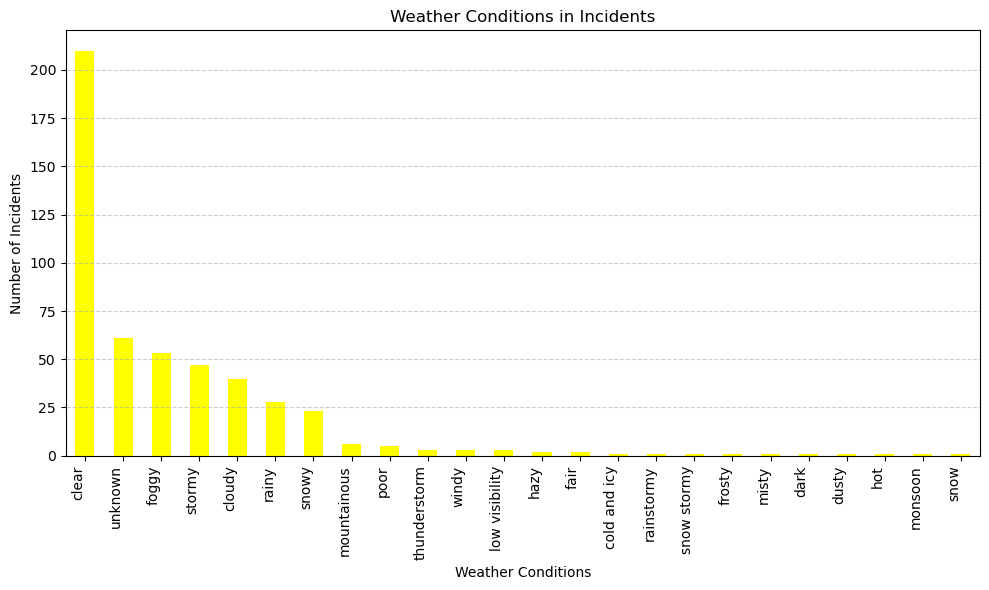

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

# Standardize the 'Weather' column by converting to lowercase and removing extra spaces
flight_df['Weather'] = flight_df['Weather'].astype(str).str.strip().str.lower()

# Count the number of incidents under each weather condition
weather_counts = flight_df['Weather'].value_counts()

# Create a bar chart to show the frequency of weather conditions during incidents
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='yellow')
plt.title('Weather Conditions in Incidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, ha='right')  # Rotate labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




<h2 style="color: gold;">ADDITIONAL : Analyze weather conditions with highest incident rates(without visualization)</h2>

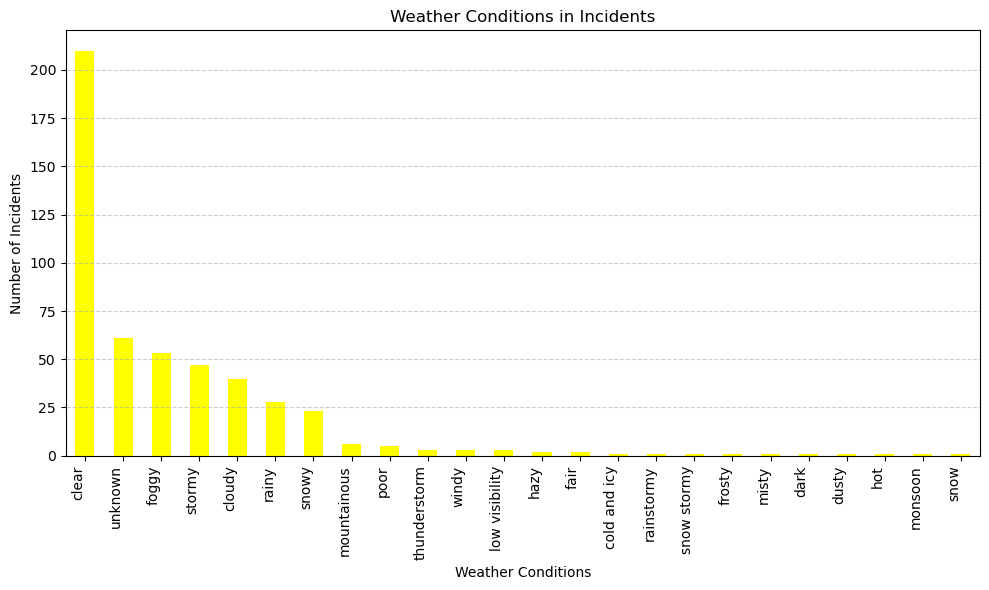

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Weather'] = flight_df['Weather'].astype(str).str.strip().str.lower()


# Count how many incidents occurred under each type of weather condition
weather_counts = flight_df['Weather'].value_counts()

# Plot a bar chart to visualize how weather conditions are linked to the number of incidents
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='yellow')
plt.title('Weather Conditions in Incidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')
# Rotate the x-axis labels to avoid overlapping and make it easier to read
plt.xticks(rotation=90, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



<h2 style="color: gold;">OBJECTIVE NO.7 : Check for repeated crashes on the same travel route</h2>

In [16]:
import pandas as pd

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Route'] = flight_df['Travel Route'].astype(str).str.strip()

# Count how many times each route appears in the dataset
route_counts = flight_df['Travel Route'].value_counts()

# Keep only the routes that appear more than once (i.e., repeated travel routes)
Repeated_routes = route_counts[route_counts > 1]

print("Repeated Travel Routes:\n")
print(Repeated_routes)



Repeated Travel Routes:

Travel Route
Pokhara to Jomsom          4
Kathmandu to Lukla         3
Boston to Los Angeles      3
Karachi to Islamabad       2
Kinshasa to Kisangani      2
Baku to Aktau              2
Moscow to Sochi            2
Petropavlovsk to Palana    2
Name: count, dtype: int64


<h2 style="color: gold;">OBJECTIVE NO.8(a) : Correlation between weather and no. of incidents using correlation heatmap</h2>

C:\Users\kk\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\kk\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


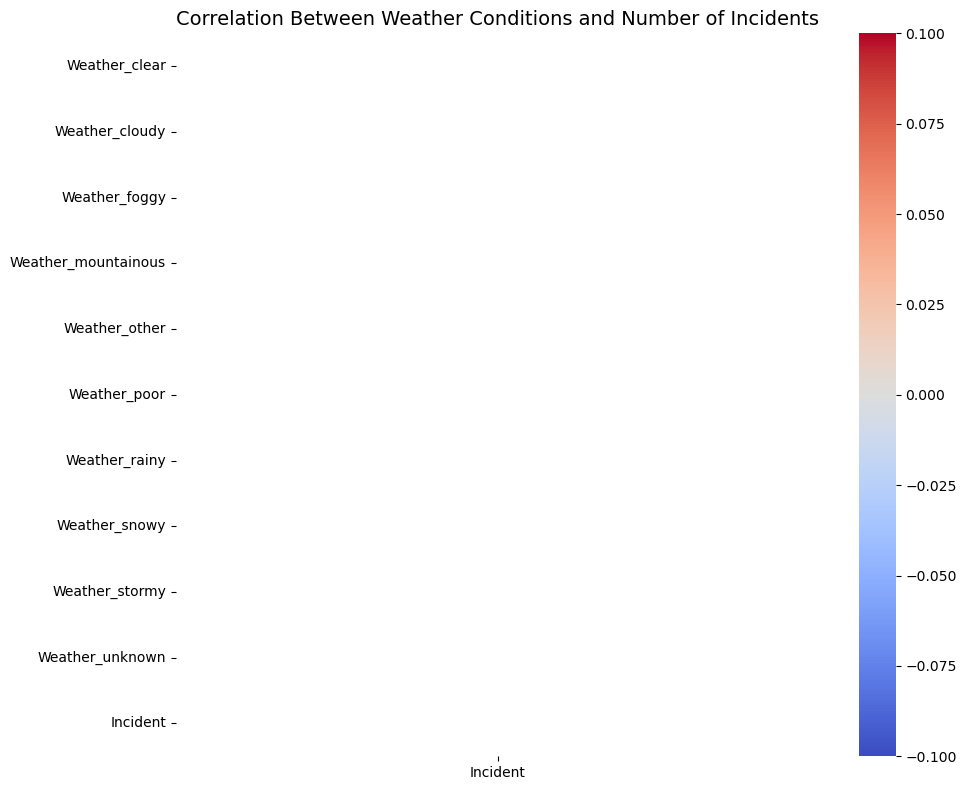

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Weather'] = flight_df['Weather'].astype(str).str.strip().str.lower()

# Identify common weather conditions (those appearing more than 3 times)
weather_counts = flight_df['Weather'].value_counts()
common_weather = weather_counts[weather_counts > 3].index

# Replace rare weather values with 'other' to simplify analysis
flight_df['Weather'] = flight_df['Weather'].apply(lambda x: x if x in common_weather else 'other')

# Convert the weather conditions into binary columns (one-hot encoding)
weather_dummies = pd.get_dummies(flight_df['Weather'], prefix='Weather')

# Add a new column to represent each row as a single incident
flight_df['Incident'] = 1

# Combine the original dataset with the one-hot encoded weather columns
combined_df = pd.concat([flight_df, weather_dummies], axis=1)

# Create a correlation matrix between each weather condition and the number of incidents
corr_matrix = combined_df[weather_dummies.columns.tolist() + ['Incident']].corr()

# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Incident']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Weather Conditions and Number of Incidents', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<h2 style="color: gold;">OBJECTIVE NO.8(b) : Correlation between weather and no. of fatilities using correlation heatmap</h2>

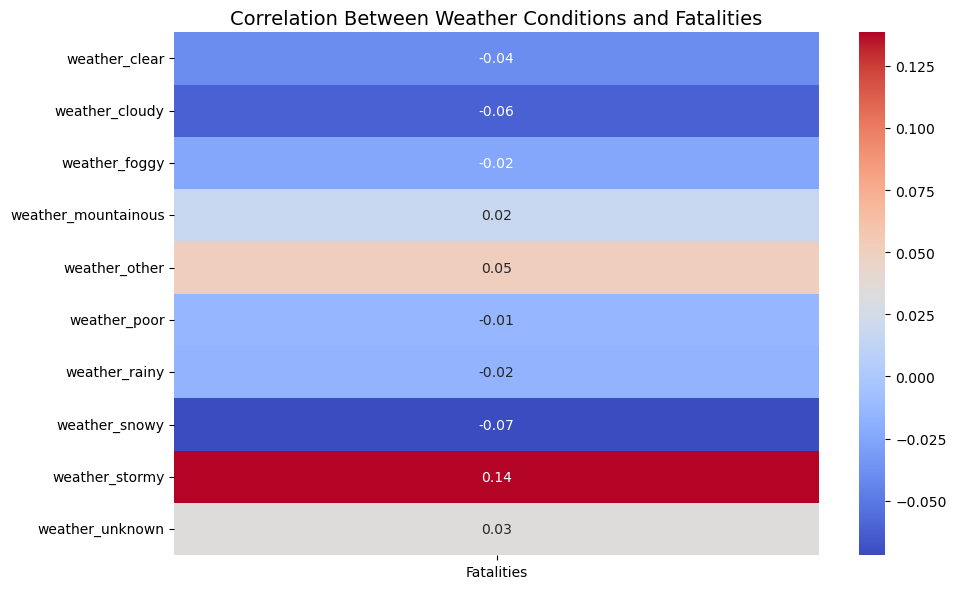

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Weather'] = flight_df['Weather'].astype(str).str.strip().str.lower()

# Identify and retain common weather types; less frequent ones will be grouped under 'other'
weather_counts = flight_df['Weather'].value_counts()
common_weather = weather_counts[weather_counts > 3].index
flight_df['Weather'] = flight_df['Weather'].apply(lambda x: x if x in common_weather else 'other')

# Ensure that the 'Fatalities' column is treated as numeric (in case of any text or invalid values)
flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')

# Remove records that are missing fatality data
flight_df = flight_df.dropna(subset=['Fatalities'])

# Convert each unique weather condition into separate binary columns (one-hot encoding)
weather_dummies = pd.get_dummies(flight_df['Weather'], prefix='weather')

# Combine the one-hot encoded weather columns with the fatalities column for correlation analysis
combined = pd.concat([weather_dummies, flight_df['Fatalities']], axis=1)

# Creating a correlation matrix to examine relationships
corr_matrix = combined.corr()

# Extract correlation values between each weather type and fatalities
weather_columns = weather_dummies.columns
heatmap_data = corr_matrix.loc[weather_columns, ['Fatalities']]

# Plot the correlation values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Weather Conditions and Fatalities', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<h2 style="color: gold;">OBJECTIVE NO.9 : Comparative Analysis of Weather Conditions Based on Incident Frequency and Fatality Severity
 </h2>

C:\Users\kk\AppData\Local\Temp\ipykernel_8312\103128021.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='Blues_r')
C:\Users\kk\AppData\Local\Temp\ipykernel_8312\103128021.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_fatalities.index, y=average_fatalities.values, palette='Reds')


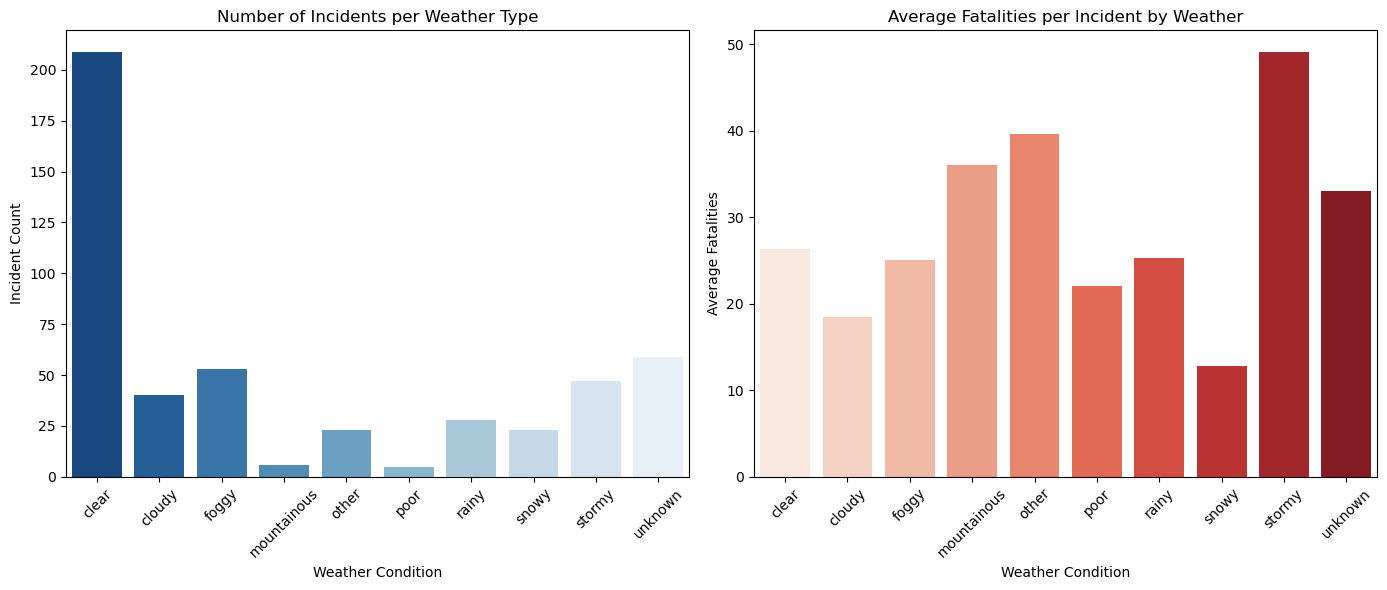

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Weather'] = flight_df['Weather'].astype(str).str.strip().str.lower()

# Make sure the 'Fatalities' column contains only numbers (non-numeric values will become NaN which I have in my dataset)
flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')

# Keep only the common weather types; group all rare or unusual types into a single category called 'other'
weather_counts = flight_df['Weather'].value_counts()
common_weather = weather_counts[weather_counts > 3].index
flight_df['Weather'] = flight_df['Weather'].apply(lambda x: x if x in common_weather else 'other')

# Remove records where the number of fatalities is missing
flight_df = flight_df.dropna(subset=['Fatalities'])

# Count how many incidents happened under each weather condition
incident_counts = flight_df['Weather'].value_counts().sort_index()

# Calculating the average number of fatalities for each weather condition
average_fatalities = flight_df.groupby('Weather')['Fatalities'].mean().sort_index()

# Set up a side-by-side bar chart layout (two charts in one row)
plt.figure(figsize=(14, 6))

# Left chart: Number of incidents under each type of weather
plt.subplot(1, 2, 1)
sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='Blues_r')
plt.title('Number of Incidents per Weather Type')
plt.xlabel('Weather Condition')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)

# Right chart: Average number of people who died in incidents under each weather condition
plt.subplot(1, 2, 2)
sns.barplot(x=average_fatalities.index, y=average_fatalities.values, palette='Reds')
plt.title('Average Fatalities per Incident by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Average Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<h2 style="color: gold;">OBJECTIVE NO.10 : Uncovering Patterns in Aviation Incidents via Clustering(Unsupervised learning)
 </h2>

C:\Users\kk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of incidents in each cluster:
Cluster
1    418
2     71
0      2
Name: count, dtype: int64


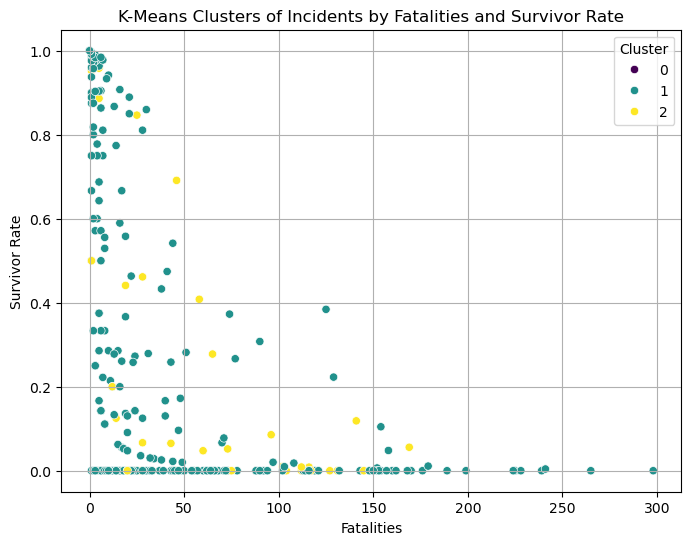

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

# Clean and standardize important columns
flight_df['Weather'] = flight_df['Weather'].astype(str).str.strip().str.lower()
flight_df['Type'] = flight_df['Type'].astype(str).str.strip().str.lower()
flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')
flight_df['Occupants'] = pd.to_numeric(flight_df['Occupants'], errors='coerce')
flight_df['Survivors'] = pd.to_numeric(flight_df['Survivors'], errors='coerce')

#This will drop rows with missing Fatalities( I HAVE IN IN MY DATAFRAME)
flight_df = flight_df.dropna(subset=['Occupants', 'Fatalities', 'Survivors', 'Weather', 'Type'])

# Create a new column for survivor rate (proportion of people who survived)
flight_df['SurvivorRate'] = flight_df['Survivors'] / flight_df['Occupants']

# One hot encoding
flight_df_encoded = pd.get_dummies(flight_df[['Weather', 'Type']], drop_first=True)

# Combining all features for clustering: numeric + encoded categorical
features = pd.concat([flight_df[['Occupants', 'Fatalities', 'Survivors', 'SurvivorRate']], flight_df_encoded], axis=1)

# Drop rows with any remaining missing values
features = features.dropna()

# Normalize all feature values to bring them to a common scale
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Match the main DataFrame with the scaled data
flight_df = flight_df.loc[features.index].reset_index(drop=True)

# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
flight_df['Cluster'] = kmeans.fit_predict(features_scaled)

print("Number of incidents in each cluster:")
print(flight_df['Cluster'].value_counts())

# Visualize the clusters using a scatter plot based on Fatalities and Survivor Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=flight_df, x='Fatalities', y='SurvivorRate', hue='Cluster', palette='viridis')
plt.title('K-Means Clusters of Incidents by Fatalities and Survivor Rate')
plt.xlabel('Fatalities')
plt.ylabel('Survivor Rate')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


<h2 style="color: gold;">ADDITIONAL : What each cluster exactly mean or what are the characteristics of each cluster group?
 </h2>

C:\Users\kk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


 Average Metrics per Cluster:

          Occupants  Fatalities   Survivors  SurvivorRate
Cluster                                                  
0        271.000000    0.000000  271.000000      1.000000
1         81.387560   27.452153   53.935407      0.451140
2         75.098592   36.380282   38.718310      0.340619

 Incident Count per Cluster:

Cluster
0      2
1    418
2     71
Name: count, dtype: int64

 Most Common Weather per Cluster:

Cluster
0      clear
1      clear
2    unknown
Name: Weather, dtype: object

 Most Common Aircraft Type per Cluster:

Cluster
0    airbus a330-300
1     boeing 737-800
2     boeing 737-200
Name: Type, dtype: object

🧍‍♂️ Occupants Stats per Cluster:

         count        mean    min    max
Cluster                                 
0            2  271.000000  173.0  369.0
1          418   81.387560    1.0  520.0
2           71   75.098592    2.0  404.0


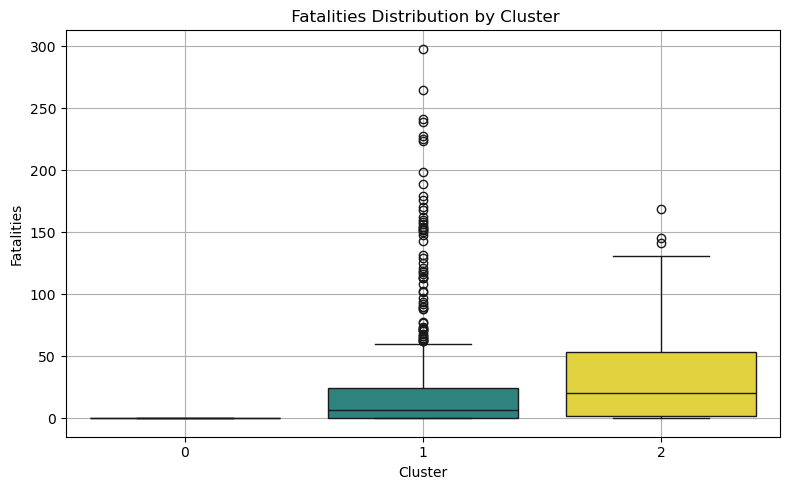

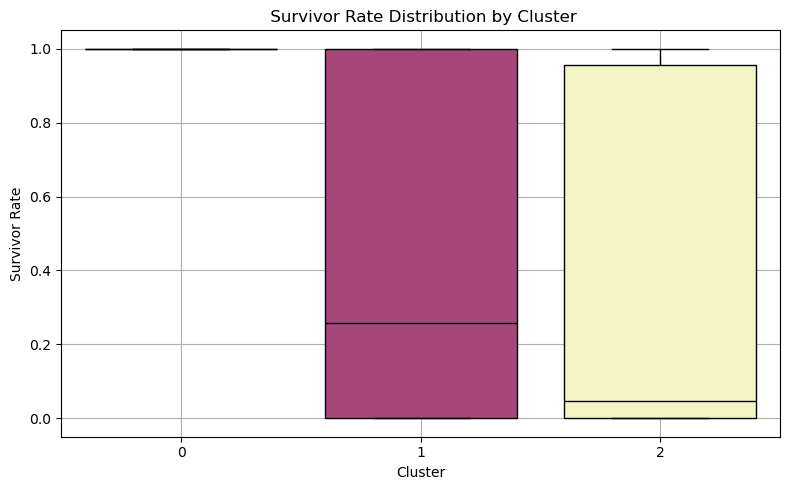

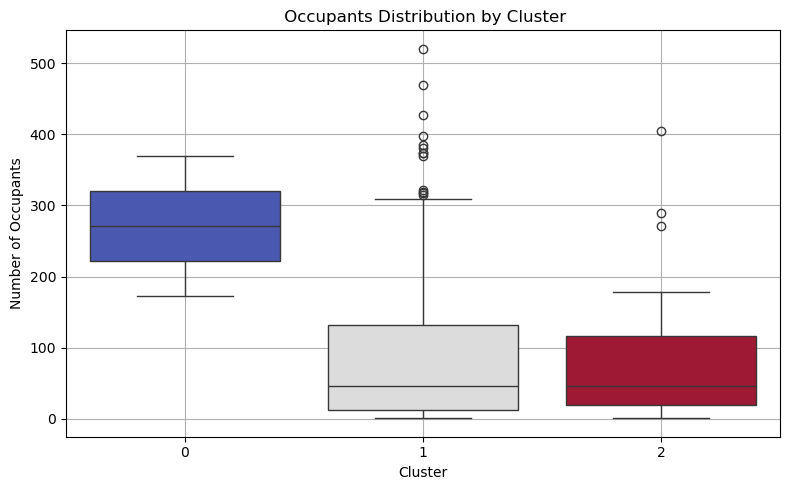

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Weather'] = flight_df['Weather'].astype(str).str.strip().str.lower()
flight_df['Type'] = flight_df['Type'].astype(str).str.strip().str.lower()

flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')
flight_df['Occupants'] = pd.to_numeric(flight_df['Occupants'], errors='coerce')
flight_df['Survivors'] = pd.to_numeric(flight_df['Survivors'], errors='coerce')

# This will drop rows with missing Fatalities( I HAVE IN IN MY DATAFRAME)
flight_df = flight_df.dropna(subset=['Occupants', 'Fatalities', 'Survivors', 'Weather', 'Type'])

# Making new feature 'Survivor rate'
flight_df['SurvivorRate'] = flight_df['Survivors'] / flight_df['Occupants']

# Converting into binary values
flight_df_encoded = pd.get_dummies(flight_df[['Weather', 'Type']], drop_first=True)

# Combine numeric + encoded features
features = pd.concat([flight_df[['Occupants', 'Fatalities', 'Survivors', 'SurvivorRate']],flight_df_encoded], axis=1)


# Drop NaNs and align indices
valid_rows = features.dropna().index
features = features.loc[valid_rows].reset_index(drop=True)
flight_df = flight_df.loc[valid_rows].reset_index(drop=True)

# Normalize data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMEANS CLUSTERING 
kmeans = KMeans(n_clusters=3, random_state=42)
flight_df['Cluster'] = kmeans.fit_predict(features_scaled)

#  CLUSTER ANALYSIS

# Average metrics by cluster
cluster_summary = flight_df.groupby('Cluster')[['Occupants', 'Fatalities', 'Survivors', 'SurvivorRate']].mean()
print(" Average Metrics per Cluster:\n")
print(cluster_summary)

#  Incident count per cluster
cluster_counts = flight_df['Cluster'].value_counts().sort_index()
print("\n Incident Count per Cluster:\n")
print(cluster_counts)

# Most common weather per cluster
most_common_weather = flight_df.groupby('Cluster')['Weather'].agg(lambda x: x.value_counts().idxmax())
print("\n Most Common Weather per Cluster:\n")
print(most_common_weather)

# Most common aircraft type per cluster
most_common_type = flight_df.groupby('Cluster')['Type'].agg(lambda x: x.value_counts().idxmax())
print("\n Most Common Aircraft Type per Cluster:\n")
print(most_common_type)

# Occupants summary (count, mean, min, max)
occupant_summary = flight_df.groupby('Cluster')['Occupants'].agg(['count', 'mean', 'min', 'max'])
print("\n🧍‍♂️ Occupants Stats per Cluster:\n")
print(occupant_summary)


# Fatalities boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=flight_df, x='Cluster', y='Fatalities', hue='Cluster', palette='viridis', legend=False)
plt.title(" Fatalities Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Fatalities")
plt.grid(True)
plt.tight_layout()
plt.show()

# Survivor rate boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=flight_df, x='Cluster', y='SurvivorRate', hue='Cluster', palette='magma', legend=False)
plt.title(" Survivor Rate Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Survivor Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

# Occupants boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=flight_df, x='Cluster', y='Occupants', hue='Cluster', palette='coolwarm', legend=False)
plt.title(" Occupants Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Occupants")
plt.grid(True)
plt.tight_layout()
plt.show()




<h2 style="color: gold;">OBJECTIVE N0.11 : NLP classification of crash causes (text-to-category)
 </h2>

C:\Users\kk\AppData\Local\Temp\ipykernel_8312\235989881.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_df, x='Cause_Cluster', palette='Set2')


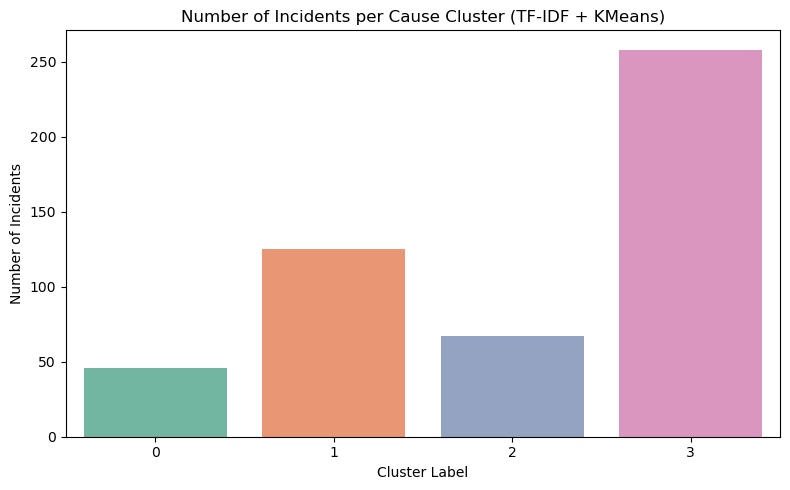


Cluster 0 — Most Common Causes:
Cause
Runway Overrun    46
Name: count, dtype: int64

Cluster 1 — Most Common Causes:
Cause
Cfit    125
Name: count, dtype: int64

Cluster 2 — Most Common Causes:
Cause
Engine Failure    63
System Failure     3
Engine Fire        1
Name: count, dtype: int64

Cluster 3 — Most Common Causes:
Cause
Pilot Error                      54
Hijack                           28
Weather                          17
Mechanical Failure               16
Unknown                          16
Fire                             15
Collision                        15
Stall                            12
Icing                             7
Missile                           6
Overloading                       5
Fuel Exhaustion                   5
Birdstrike                        5
Structural Failure                4
Gear Failure                      4
Spatial Disorientation            3
Landing Gear Failure              3
Lightning                         2
Explosion             

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

# Replace missing values in the 'Cause' column with the word "Unknown"
flight_df['Cause'] = flight_df['Cause'].fillna("Unknown")

flight_df['Cause'] = flight_df['Cause'].str.strip().str.lower().str.title()

# Use TF-IDF to turn the 'Cause' text into numerical features (ignoring common English words)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(flight_df['Cause'])

# Apply KMeans clustering to group similar causes into clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
flight_df['Cause_Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Visualize how many incidents fall into each cause cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=flight_df, x='Cause_Cluster', palette='Set2')
plt.title('Number of Incidents per Cause Cluster (TF-IDF + KMeans)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# Print the most common causes within each cluster group
for i in range(num_clusters):
    most_common = flight_df[flight_df['Cause_Cluster'] == i]['Cause'].value_counts().head(150)
    print(f"\nCluster {i} — Most Common Causes:\n{most_common}")




<h2 style="color: gold;">OBJECTIVE N0.12 : Predict survivability using known inputs (LOGISTIC REGRESSION)
 </h2>

🔍 Confusion Matrix:
 [[12 31]
 [18 39]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.28      0.33        43
           1       0.56      0.68      0.61        57

    accuracy                           0.51       100
   macro avg       0.48      0.48      0.47       100
weighted avg       0.49      0.51      0.49       100



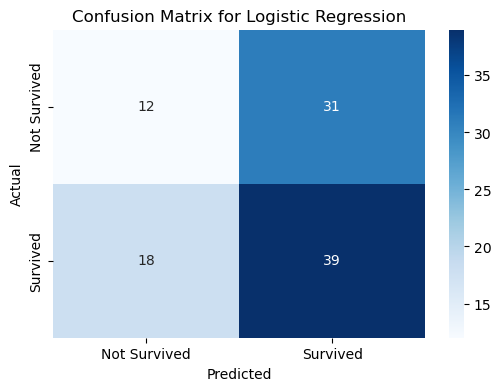

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Survivors'] = pd.to_numeric(flight_df['Survivors'], errors='coerce')

# Create a new column that marks 1 if someone survived, 0 if not
flight_df['Survived'] = (flight_df['Survivors'] > 0).astype(int)

# Remove rows that are missing critical info (Occupants, Weather, Plane Type, or Operator)
flight_df = flight_df.dropna(subset=['Occupants', 'Weather', 'Type', 'Operator'])

# Convert categorical features into numeric using one-hot encoding
X = pd.get_dummies(flight_df[['Occupants', 'Weather', 'Type', 'Operator']], drop_first=True)

# Our target variable is the 'Survived' column
y = flight_df['Survived']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric values so they are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model to predict survival
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test_scaled)

# Display confusion matrix and classification report
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Not Survived', 'Survived'],
yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



<h2 style="color: gold;">OBJECTIVE N0.13 : Predicting Fatalities using Occupants + Weather (LINEAR REGRESSION)
 </h2>

Linear Regression Evaluation:
MAE (Mean Absolute Error): 34.69
RMSE (Root Mean Squared Error): 52.06
R² Score: 0.03


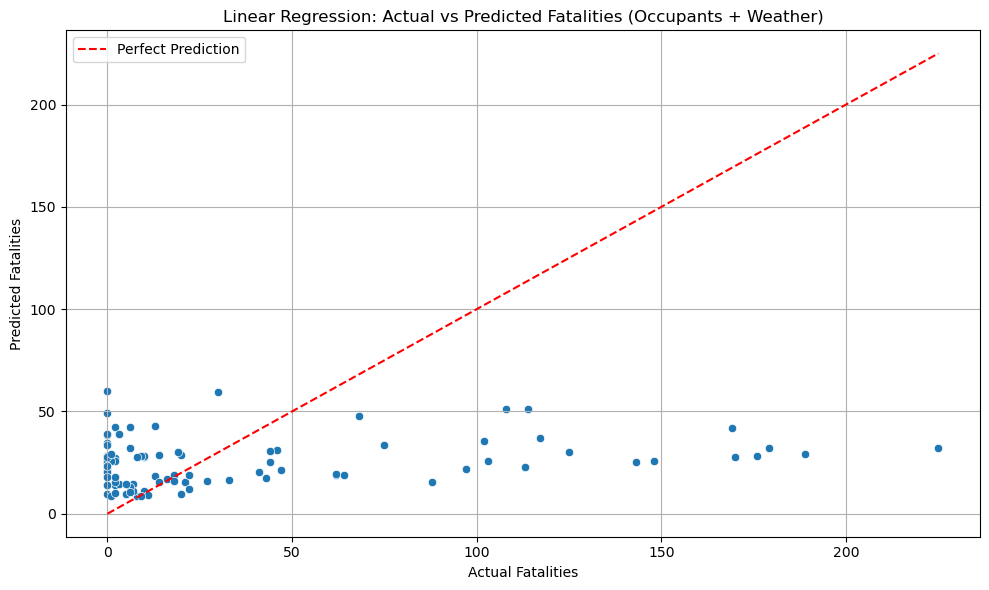

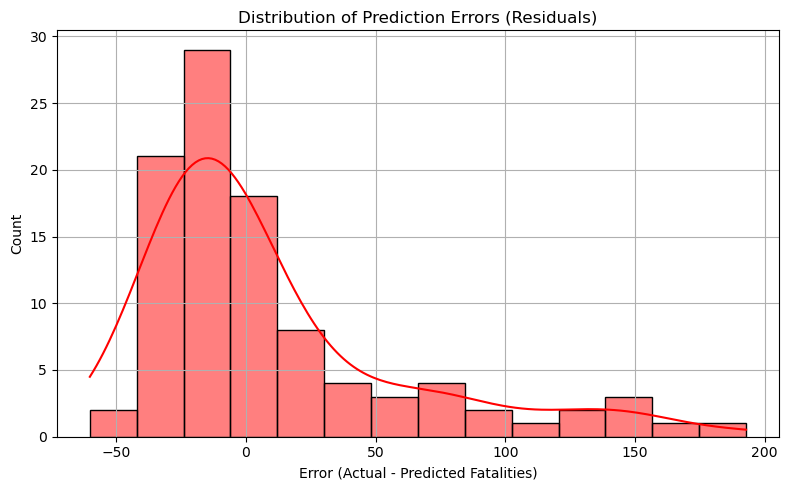

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

# Convert important numeric columns to actual numbers
cols = ['Occupants', 'Fatalities']
flight_df[cols] = flight_df[cols].apply(pd.to_numeric, errors='coerce')

flight_df = flight_df.dropna(subset=['Occupants', 'Weather', 'Fatalities'])

# One hot-encoding to convert categorical values
weather_encoded = pd.get_dummies(flight_df['Weather'], drop_first=True)

# Combine 'Occupants' and encoded weather data as features
X = pd.concat([flight_df[['Occupants']], weather_encoded], axis=1)

# Set 'Fatalities' as the target variable
y = flight_df['Fatalities']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Visualizations ---

# Scatter plot of actual vs predicted fatalities
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Add a red dashed line to show perfect predictions
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.title('Linear Regression: Actual vs Predicted Fatalities (Occupants + Weather)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Optional: Check error distribution ---

# Calculate residuals (prediction errors)
residuals = y_test - y_pred

# Plot a histogram of the residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color="red")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted Fatalities)")
plt.grid(True)
plt.tight_layout()
plt.show()


<h2 style="color: gold;">OBJECTIVE NO.14 : Predicting Fatalities using Occupants + Weather (DECISION TREE)
 </h2>

Decision Tree Regressor Performance:
MAE: 37.02
RMSE: 71.72
R² Score: -0.84


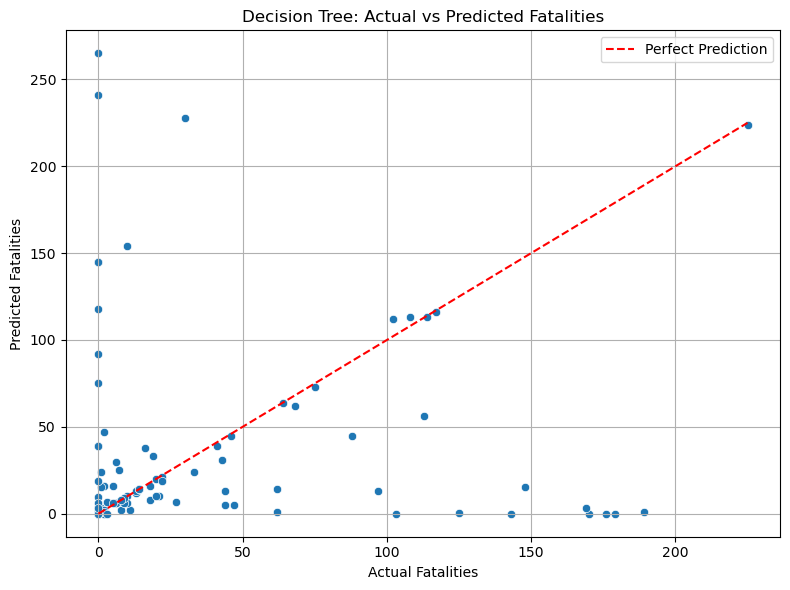

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df['Occupants'] = pd.to_numeric(flight_df['Occupants'], errors='coerce')
flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')

# Remove rows where 'Occupants', 'Fatalities', or 'Weather' data is missing
flight_df = flight_df.dropna(subset=['Fatalities', 'Occupants', 'Weather'])

# One hot-encoding to convert categorical values into numerical values
flight_df = pd.get_dummies(flight_df, columns=['Weather'], drop_first=True)

# Define input features (X) and target variable (y)
X = flight_df.drop(['Fatalities'], axis=1)[['Occupants'] + [col for col in flight_df.columns if col.startswith('Weather_')]]
y = flight_df['Fatalities']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict fatalities on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model using standard metrics
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

# Print out the evaluation results
print("Decision Tree Regressor Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Visualization ---

# Create a scatter plot to compare actual vs predicted fatalities
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)

# Add a diagonal reference line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Decision Tree: Actual vs Predicted Fatalities")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



<h2 style="color: gold;">OBJECTIVE NO.15 : Find out the probability of survival and fatility 
 </h2>

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

flight_df = pd.read_csv("Plane_Incidents(2000-2025).csv", encoding='ISO-8859-1')

flight_df = flight_df.dropna(subset=['Occupants', 'Survivors', 'Fatalities'])

# Convert string values to numeric where needed
flight_df['Occupants'] = pd.to_numeric(flight_df['Occupants'], errors='coerce')
flight_df['Survivors'] = pd.to_numeric(flight_df['Survivors'], errors='coerce')
flight_df['Fatalities'] = pd.to_numeric(flight_df['Fatalities'], errors='coerce')

# Drop any remaining rows with missing data
flight_df = flight_df.dropna(subset=['Occupants', 'Survivors', 'Fatalities'])

# Create a binary column: 1 if there were any survivors, else 0
flight_df['Survived'] = flight_df['Survivors'].apply(lambda x: 1 if x > 0 else 0)

# Select the relevant features for modeling
features = ['Occupants', 'Fatalities', 'Weather', 'Type']
model_df = flight_df[features + ['Survived']].copy()

# Convert text features ('Weather', 'Type') to numerical form using Label Encoding
model_df['Weather'] = LabelEncoder().fit_transform(model_df['Weather'].astype(str))
model_df['Type'] = LabelEncoder().fit_transform(model_df['Type'].astype(str))

# Define input features (X) and target variable (y)
X = model_df[features]
y = model_df['Survived']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict the survival/fatality probabilities for all incidents
all_probs = model.predict_proba(X)

# Calculate and display the overall average predicted probabilities
avg_survival = all_probs[:, 1].mean()
avg_fatality = all_probs[:, 0].mean()

print(f" Average Probability of Survival: {avg_survival:.2%}")
print(f" Average Probability of Fatality: {avg_fatality:.2%}")




 Average Probability of Survival: 58.86%
 Average Probability of Fatality: 41.14%
